In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(54808, 14)

In [4]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
train.describe(include = 'all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [7]:
test.shape

(23490, 13)

In [8]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [10]:
test.describe(include = 'all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490,23490,22456,23490,23490,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7315,5299,15578,16596,13078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39041.399149,NaN,NaN,NaN,NaN,NaN,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,NaN,NaN,NaN,NaN,NaN,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000


In [11]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [13]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [14]:
train['education'] = train['education'].fillna(train['education'].mode()[0])
test['education'] = test['education'].fillna(test['education'].mode()[0])

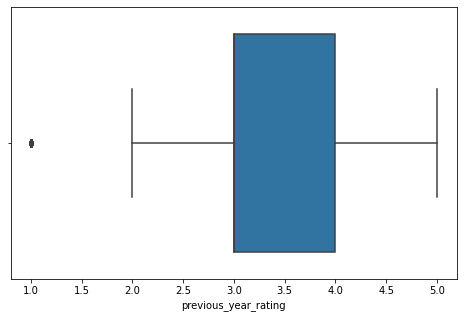

In [15]:
plt.figure(figsize = (8,5))
sns.boxplot('previous_year_rating', data = train)

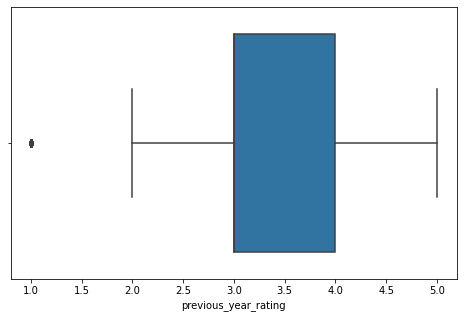

In [16]:
plt.figure(figsize = (8,5))
sns.boxplot('previous_year_rating', data = test)

In [17]:
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mean())
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mean())

In [20]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [23]:
train.describe(include = 'all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,54808,54808,54808,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,39078,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.211661,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


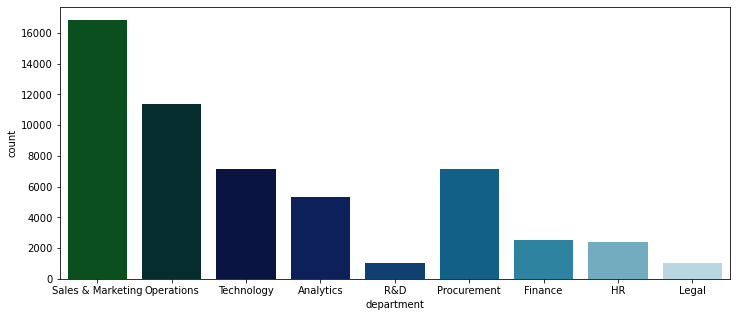

In [32]:
plt.figure(figsize=(12,5))
sns.countplot('department',data = train, palette='ocean')

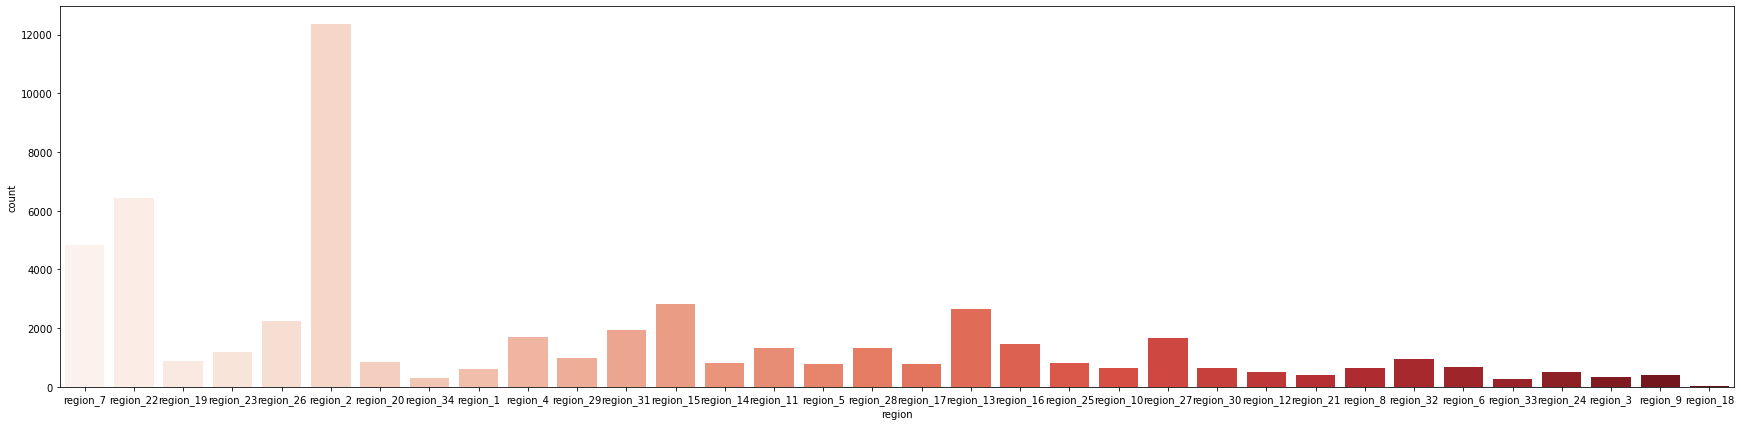

In [40]:
plt.figure(figsize=(30,7))
sns.countplot('region',data = train, palette='Reds')

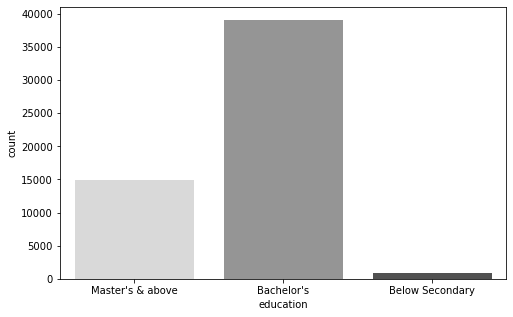

In [42]:
plt.figure(figsize=(8,5))
sns.countplot('education',data = train, palette= 'Greys')

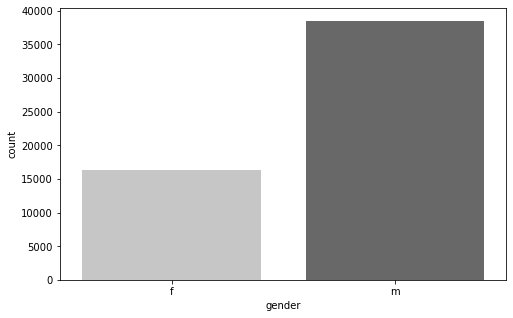

In [55]:
plt.figure(figsize=(8,5))
sns.countplot('gender',data = train, palette= 'Greys')

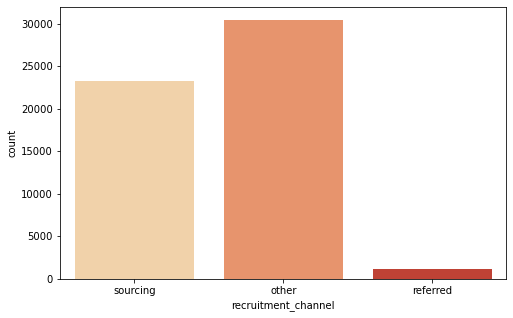

In [43]:
plt.figure(figsize=(8,5))
sns.countplot('recruitment_channel',data = train, palette= 'OrRd')

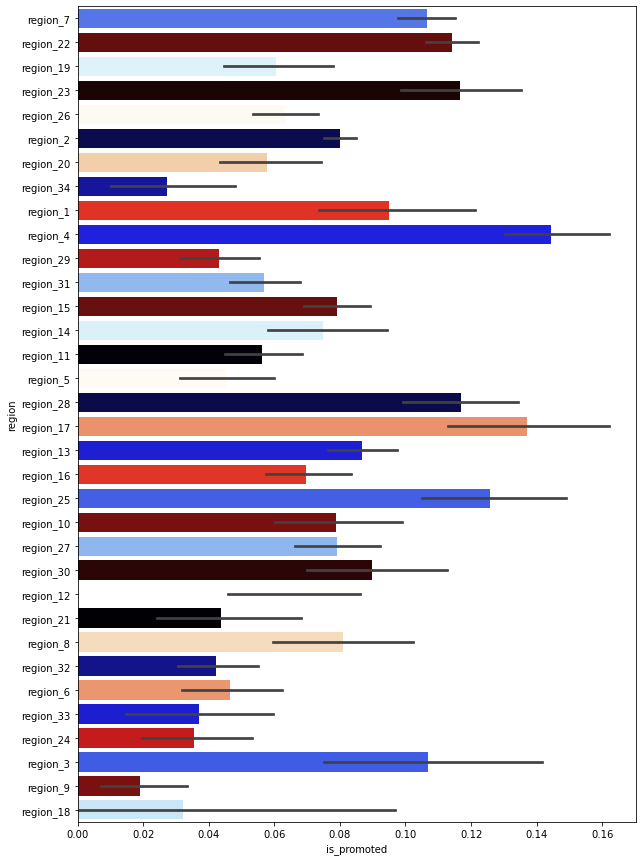

In [45]:
plt.figure(figsize=(10,15))
sns.barplot(y='region', x='is_promoted', data=train, palette='flag')

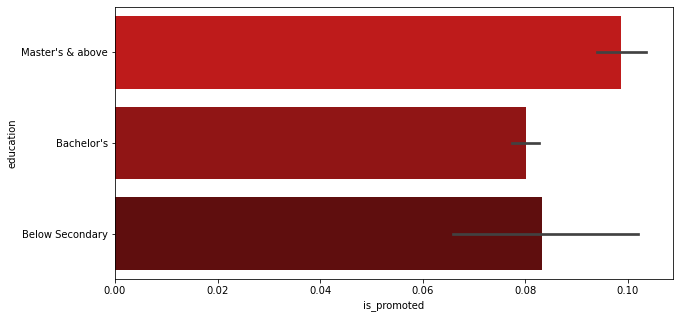

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(y='education', x='is_promoted', data=train, palette='flag')

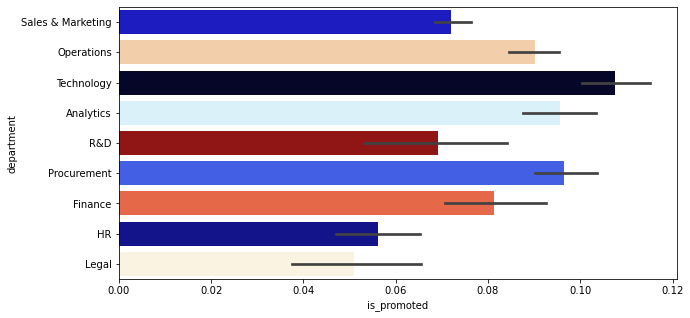

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(y='department', x='is_promoted', data=train, palette='flag')

In [49]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [50]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [57]:
cols = ['department','region','education','gender','recruitment_channel']
for i in cols:
    train[i] = label.fit_transform(train[i])

In [58]:
for i in cols:
    test[i] = label.fit_transform(test[i])

In [60]:
Train = pd.get_dummies(train, columns = cols)
Test = pd.get_dummies(test, columns = cols)

In [63]:
final_train = Train.select_dtypes(exclude = object)
final_test = Test.select_dtypes(exclude = object)

In [64]:
final_train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_0,...,region_32,region_33,education_0,education_1,education_2,gender_0,gender_1,recruitment_channel_0,recruitment_channel_1,recruitment_channel_2
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,0,60,0,0,...,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,0,50,0,0,...,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,1,0,0,0,1,1,0,0


In [65]:
final_test.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_0,department_1,...,region_32,region_33,education_0,education_1,education_2,gender_0,gender_1,recruitment_channel_0,recruitment_channel_1,recruitment_channel_2
0,8724,1,24,3.339146,1,1,0,77,0,0,...,0,0,1,0,0,0,1,0,0,1
1,74430,1,31,3.000000,5,0,0,51,0,0,...,0,0,1,0,0,1,0,1,0,0
2,72255,1,31,1.000000,4,0,0,47,0,0,...,0,0,1,0,0,0,1,1,0,0
3,38562,3,31,2.000000,9,0,0,65,0,0,...,0,0,1,0,0,1,0,1,0,0
4,64486,1,30,4.000000,7,0,0,61,0,1,...,0,0,1,0,0,0,1,0,0,1


In [66]:
X = final_train.drop(['is_promoted'], axis = 1)
y = final_train[['is_promoted']]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 500)

In [68]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor



lin = LinearRegression()
Rd = Ridge()
Ls = Lasso()
KNN = KNeighborsRegressor()
NB = GaussianNB() 
SVM = SVR()
DT = DecisionTreeRegressor(criterion='mse', splitter='best', 
                           max_depth=5000, min_samples_split=2, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_features=None, 
                           random_state=None, max_leaf_nodes=None, 
                           min_impurity_decrease=0, min_impurity_split=None, 
                           ccp_alpha=0)
RF = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                             max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                             random_state=None, verbose=0, warm_start=False, 
                             ccp_alpha=0.0, max_samples=None)

BR = BaggingRegressor(base_estimator = DT)
GBR = GradientBoostingRegressor()

In [69]:
algo = [lin, Rd, Ls, KNN, SVM, DT, RF, BR, GBR]
Algo_names = ['LinearRegression','Ridge',
              'Lasso','KNeighborsRegressor','SVM',
              'DecisionTreeRegressor','RandomForestRegressor','BaggingRegressor','GradientBoostingRegressor']
rmse_list = []

In [71]:
for name in algo:
    model = name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)

In [73]:
evaluation = pd.DataFrame({'Model': Algo_names, 'RMSE': rmse_list})
evaluation.sort_values(by = 'RMSE', ascending = True)

,Model,RMSE
8,GradientBoostingRegressor,0.223492
6,RandomForestRegressor,0.232962
7,BaggingRegressor,0.234867
0,LinearRegression,0.241998
1,Ridge,0.242002
2,Lasso,0.277150
4,SVM,0.277603
3,KNeighborsRegressor,0.299699
5,DecisionTreeRegressor,0.316199


In [74]:
submission = pd.read_csv('submission.csv')
model = GBR
model.fit(X, y)
Predict = model.predict(final_test)
Prediction1 = Predict.astype(int)
submission['is_promoted'] = Prediction1
submission['is_promoted'] = submission['is_promoted'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('GBR_submission.csv', index = False)